Gabriel Schrader Vilas Boas, RA: 150981

João Paulo Paixão Rocha, RA: 156408

Luigi Rufca Catelli Fernandez, RA: 156700

##Projeto 4###


###As simulações represantam a evolução de uma infecção viral que se espalha por contato entre as pessoas, repesentadas pelo grafo

##Bibliotecas

In [ ]:
# Bibliotecas
import networkx as nx
import matplotlib.pyplot as plt
import random as rd

##Códigos

Função para geração dos grafos, a qual recebe como parâmetros de
entrada um grafo sem arestas, uma lista de vértices, a probabilidade
de uma aresta ser criada e o número de arestas.

In [ ]:
n = 500
T = 20 # tempo em semanas
Tl = [i for i in range(T)]

def criaGrafo(G, lista, prob, nArestas):
  for i in range(n):
    G.add_node(i)
    lista.append(i)
  for i in range(nArestas):
    v1 = rd.randint(0, n-1)
    v2 = rd.randint(0, n-1)
    chance = rd.random()
    if v1 != v2 and chance < prob:
      G.add_edge(v1, v2)

Função que realiza a contaminação nos vértices(indivíduos) do grafo
tendo como parametros o grafo, uma lista de vertices do grafo, a probabilidade
de haver o contágio, a população inicial infectada e o tempo de cura para a
doença.

In [ ]:
def contaminacao(G, lista, prob, pop_infectada, tempo_de_cura):
  lista_pop = [0 for i in range(len(lista))]
  lista_infectados = []
  dias_infectados = [0 for i in range(len(lista))]
  num_contaminados = [] #contaminados a cada T
  infeccoes_diarias = [0 for i in range(T)]
  for i in range(pop_infectada):
    individuo = rd.randint(0, n-1)
    while True:
      if individuo not in lista_infectados:
        lista_infectados.append(individuo)
        lista_pop[individuo] = 1
        break
      else:
        individuo = rd.randint(0, n-1)
  
  for i in range(T):
    num_contaminados.append(len(lista_infectados))
    #individuos curados
    for l in range(len(lista_pop)):
      if lista_pop[l] == 1:
        dias_infectados[l] += 1
      if dias_infectados[l] == tempo_de_cura:
        lista_pop[l] = 0
        dias_infectados[l] = 0
        #num_contaminados[i] -= 1

    #atualiza infeccoes
    for j in lista_infectados:
      vizinhos = []
      for k in G.neighbors(j):
        chance = rd.random()
        if chance < prob:
          if lista_pop[k] == 0:
            lista_pop[k] = 1
            lista_infectados.append(k)
            infeccoes_diarias[i]+=1
    color_map = []
    for node in G:  
      if lista_pop[node] == 1:
          color_map.append('red')
      else: 
          color_map.append('green')  
    if i%5 == 0:      
      plt.title(f'Infectados no tempo {i}')
      nx.draw(G, pos=nx.spring_layout(G, seed = 100), node_color=color_map)
    plt.show()
  plt.title("Numero total de infectados")
  plt.plot(Tl, num_contaminados)
  plt.show()
  plt.title("Numero diario de infectados")
  plt.plot(Tl, infeccoes_diarias)
  plt.show()

##Simulação 1

###Grafos e Análises

####Rede Aleatória

Abaixo, temos a criação do grafo da rede aleatória.
Nele, passamos como parâmetros de criação um grafo
qualquer iniciado, uma lista de vértices (inicialmente
vazia), a probabilidade de criação de aresta como 1, isto
é, sempre haverá a criação de uma aresta e o número de arestas
que serão criadas. 

In [ ]:
G = nx.Graph()
lista = []
criaGrafo(G, lista, 1, 1000)
cont = contaminacao(G, lista, 0.2, 2, 3)

NameError: ignored

Como pode-se observar acima, temos diferentes estados do grafo original, em que uma propagação de uma doença é feita pelos indivíduos vermelhos para os indivíduos verdes (saudáveis). Após esses diferentes estados do grafo, temos a plotagem de um gráfico que mostra o número de indivíduos infectados para cada instante de tempo T. Note que o número de indivíduos ultrapassa o número da população (500) por que um indivíduo já curado pode pegar a doença novamente, somando no número total de casos de infectados. Além disso, para o tempo T dado e com os parâmetros estabelecidos, alguns vértices(indivíduos) não pegam a doença, principalmente aqueles que não possuem arestas com o núcleo.

####Livre de Escala

Abaixo, temos a geração do grafo livre de escala. Nele, assim como no grafo de rede aleatória, os parâmetros são os mesmos, porém com variação na probabilidade de criação das arestas. Para esta simulação, utilizamos uma probabilidade de 50%, sendo obrigado inserir 2000 arestas, de forma que o grau médio deste grafo se mantenha em 4.

In [ ]:
GLivre = nx.Graph()
lista = []
criaGrafo(GLivre, lista, 0.5, 2000)
contaminacao(GLivre, lista, 0.2, 20, 3)

Nesta simulação, para o grafo livre de escala, os parâmetros definidos geram um grafo em que o contágio se dá rapidamente, apesar de alguns indivíduos, mesmo estando inseridos no núcleo do grafo, não apresentarem a doença.


##Simulação 2

###Grafos e Análises

####Rede Aleatória

Simulação para observar o comportamento da doença com a probabilidade de 1 de contaminação.Ou seja, a cada tempo todos os vertices com ligação transmite a doença

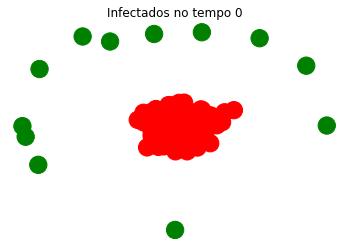

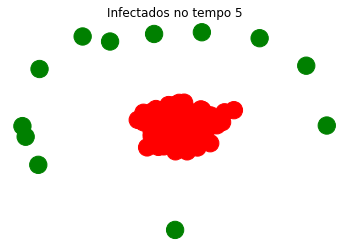

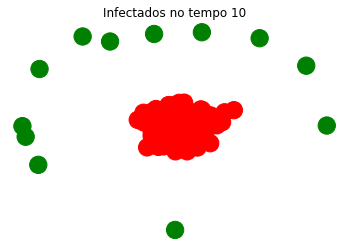

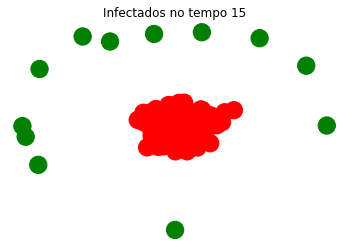

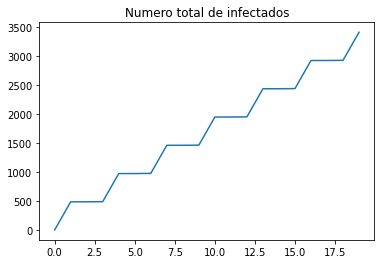

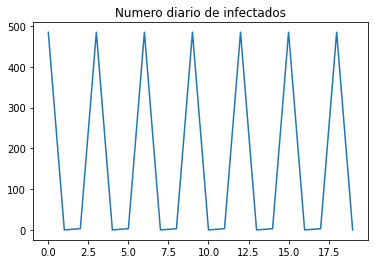

In [ ]:
G = nx.Graph()
lista = []
criaGrafo(G, lista, 1, 1000)
cont = contaminacao(G, lista, 1, 3, 3)

Com a chance de transmissão sendo 100% podemos observar que a população contaminada aumenta de forma muito rapida de forma linear. Assim, a cada tempo os vizinhos de uma aresta , sempre se tornaram infectados.

####Livre de Escala

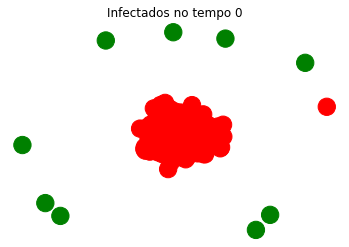

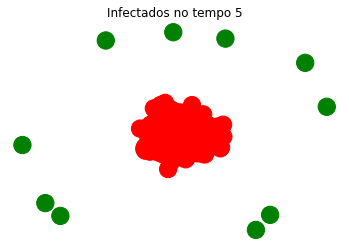

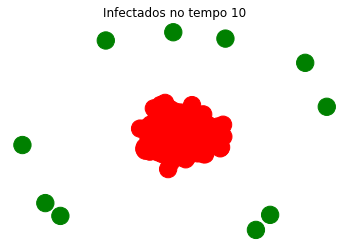

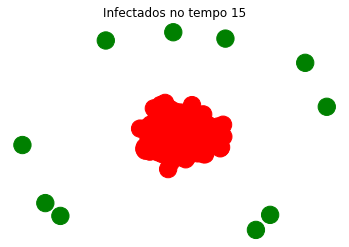

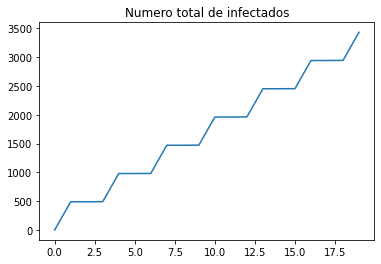

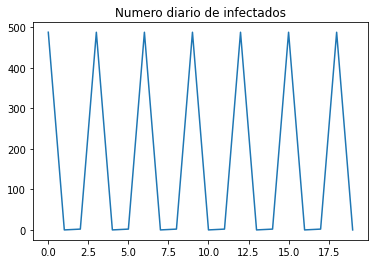

In [ ]:
GLivre = nx.Graph()
lista = []
criaGrafo(GLivre, lista, 0.5, 2000)
contaminacao(GLivre,lista, 1, 3, 3)

##Simulação 3

###Grafos e Análises

####Rede Aleatória

Simulação com a probabilidade de transmissão sendo de 0.

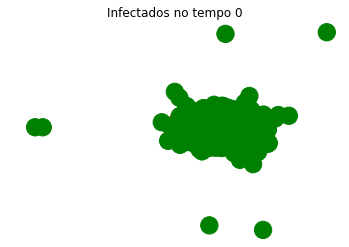

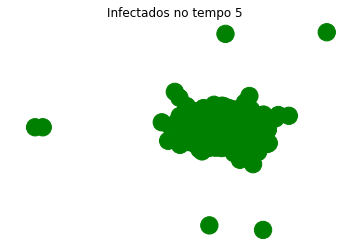

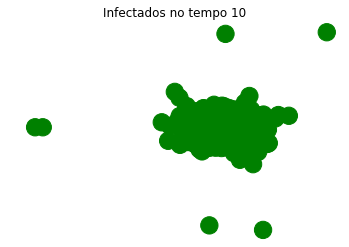

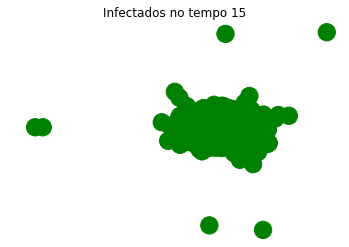

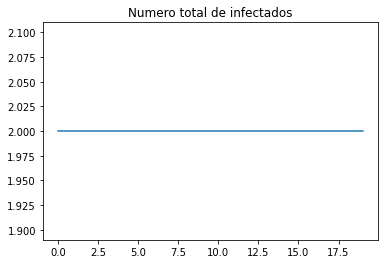

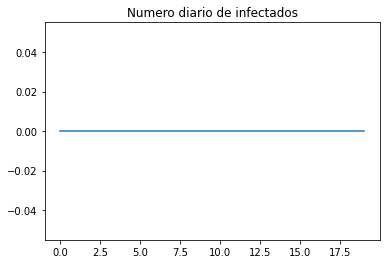

In [ ]:
G = nx.Graph()
lista = []
criaGrafo(G, lista, 1, 1000)
cont = contaminacao(G, lista, 0, 2, 3)

A simulação com a probabilidade de contaminação sendo 0 , faz com que os únicos contaminados do sistema seja os contaminados iniciais.Assim, a cada tempo se mantem o número de infectados, gerando um gráfico de um função continua.

####Livre de Escala

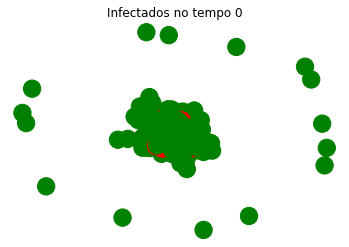

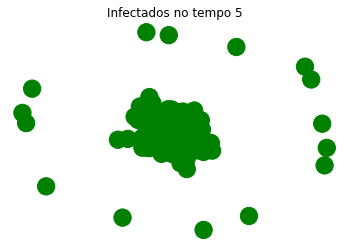

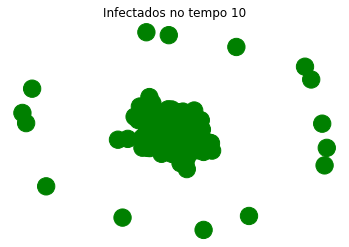

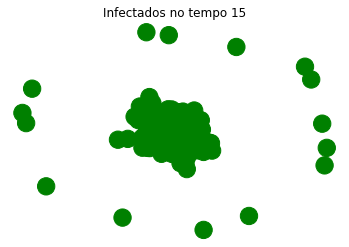

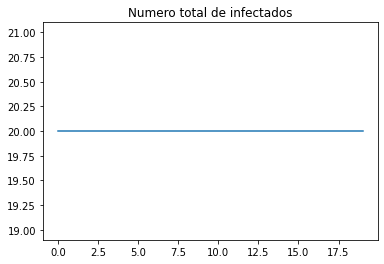

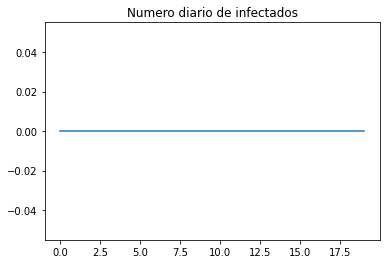

In [ ]:
GLivre = nx.Graph()
lista = []
criaGrafo(GLivre, lista, 0.5, 2000)
contaminacao(GLivre, lista, 0, 20, 3)

##Simulação 4

###Grafos e Análises

Nesta simulação, foram usados parametros maiores que nas anteriores, de forma a observar o que acontece quando se tem uma probabilidade maior de infecção e um tempo maior de cura. A probabilidade desta contaminação será 45% e o tempo de cura será 10 dias, enquanto o tempo total será de 40 dias e a populacao incial de infectados não se alterou.

####Rede Aleatória

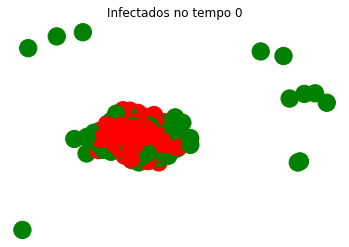

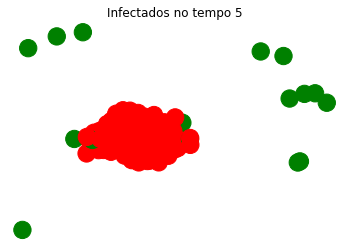

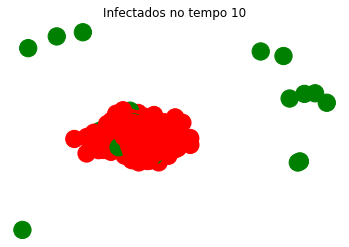

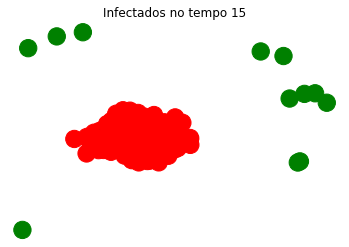

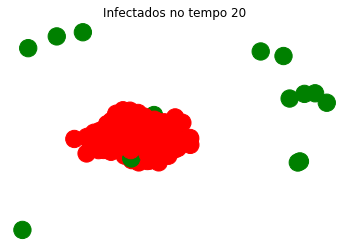

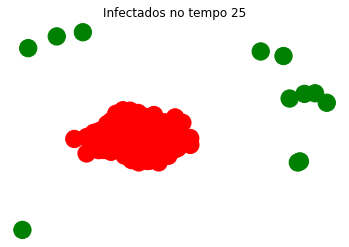

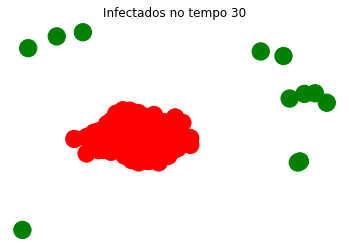

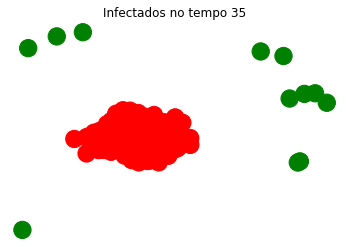

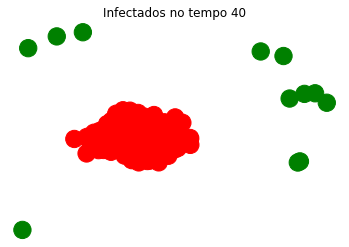

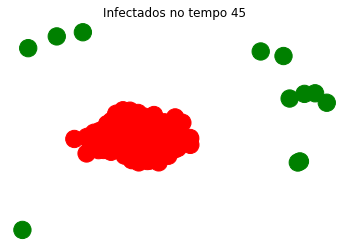

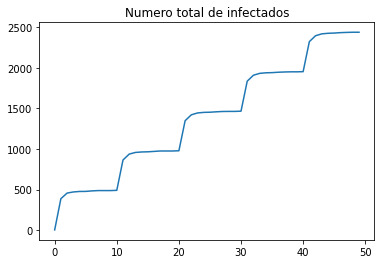

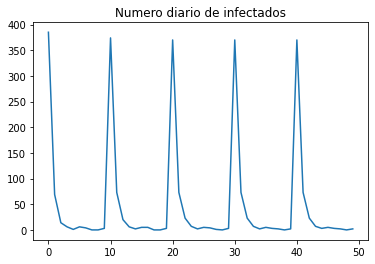

In [ ]:
G = nx.Graph()
lista = []
T = 50
Tl = [i for i in range(T)] 
criaGrafo(G, lista, 1, 1000)
cont = contaminacao(G, lista, 0.45, 2, 10)

####Livre de Escala

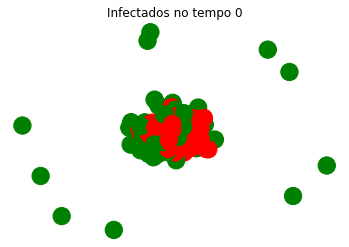

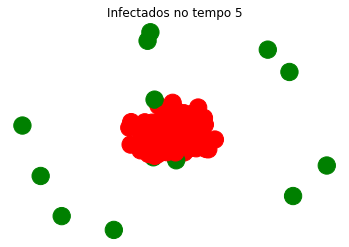

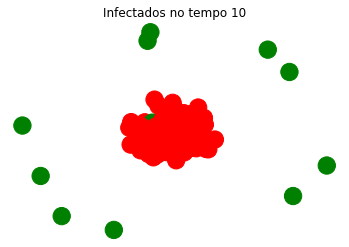

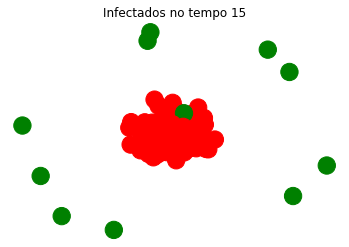

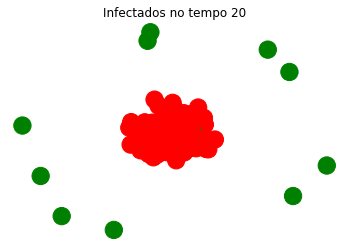

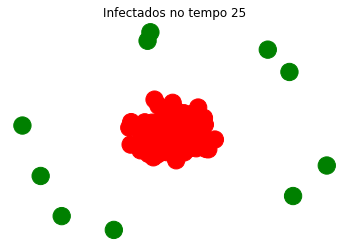

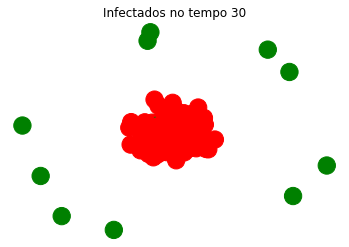

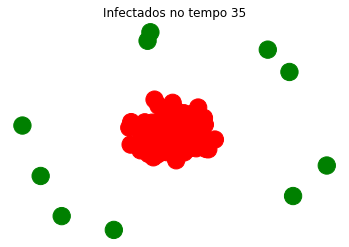

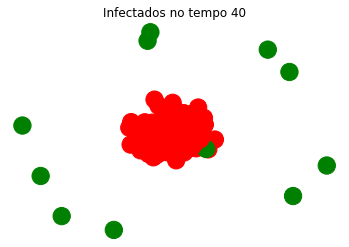

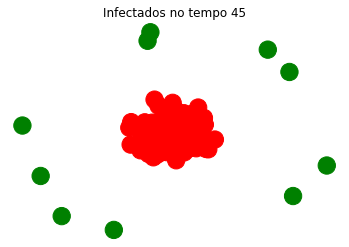

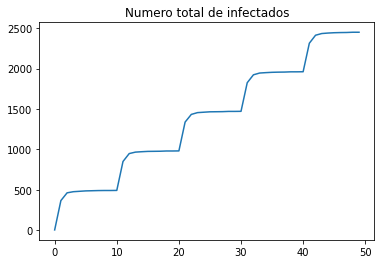

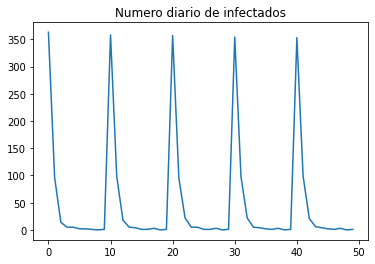

In [ ]:
GLivre = nx.Graph()
lista = []
criaGrafo(GLivre, lista, 0.5, 2000)
contaminacao(GLivre, lista, 0.45, 2, 10)

Com a probabilidade maior e mais tempo para se curar, a população inteira fica contamidada rapidamente, como é possivel ver no grafico de infecados. Além disso, como o período de cura é longo, há períodos extendidos em que nao temos aumento no numero de infecções, uma vez que toda a população que está ligada está infectada ao mesmo tempo

##Simulação 5

A simulação 5 conta com o desenvolvimento de uma vacina, que após comecar a se aplicada na população, comecará a reduzir a probabilidade de infecção

###Nova função de contaminação com vacina

In [ ]:
def contaminacao_com_vacina(G, lista, prob, pop_infectada, tempo_de_cura):
  lista_pop = [0 for i in range(len(lista))]
  lista_infectados = []
  dias_infectados = [0 for i in range(len(lista))]
  num_contaminados = [] #contaminados a cada T
  infeccoes_diarias = [0 for i in range(T)]

  for i in range(pop_infectada):
    individuo = rd.randint(0, n-1)
    while True:
      if individuo not in lista_infectados:
        lista_infectados.append(individuo)
        lista_pop[individuo] = 1
        break
      else:
        individuo = rd.randint(0, n-1)
  
  for i in range(T):
    if i > T/4:
      prob -=0.1
    num_contaminados.append(len(lista_infectados))
    #individuos curados
    for l in range(len(lista_pop)):
      if lista_pop[l] == 1:
        dias_infectados[l] += 1
      if dias_infectados[l] == tempo_de_cura:
        lista_pop[l] = 0
        dias_infectados[l] = 0
        #num_contaminados[i] -= 1

    #atualiza infeccoes
    for j in lista_infectados:
      vizinhos = []
      for k in G.neighbors(j):
        chance = rd.random()
        if chance < prob:
          if lista_pop[k] == 0:
            lista_pop[k] = 1
            lista_infectados.append(k)
            infeccoes_diarias[i] += 1
    color_map = []
    for node in G:  
      if lista_pop[node] == 1:
          color_map.append('red')
      else: 
          color_map.append('green')  
    if i%5 == 0:      
      plt.title(f'Infectados no tempo {i}')
      nx.draw(G, pos=nx.spring_layout(G, seed = 100), node_color=color_map)
    plt.show()
  plt.title("Numero total de infectados")
  plt.plot(Tl, num_contaminados)
  plt.show()
  plt.title("Numero diario de infectados")
  plt.plot(Tl, infeccoes_diarias)
  plt.show()

###Grafos e Análises

####Rede Aleatória

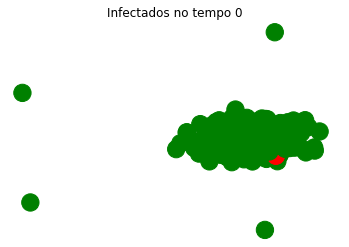

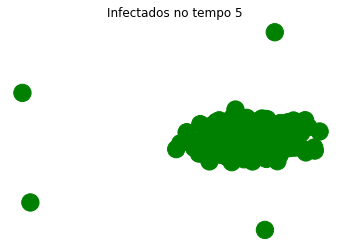

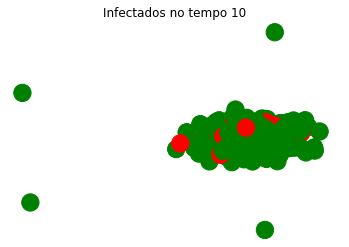

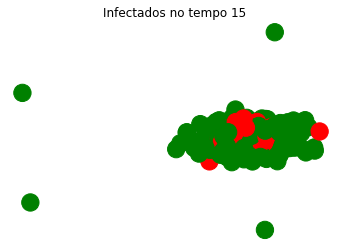

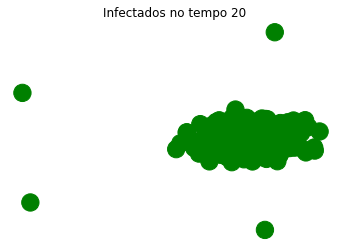

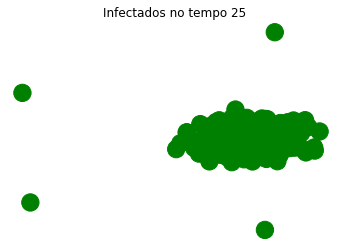

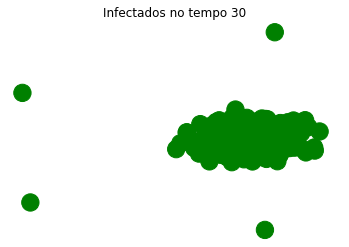

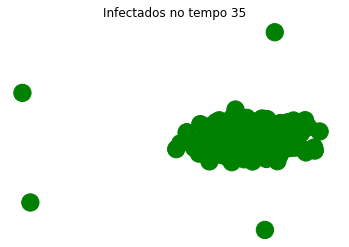

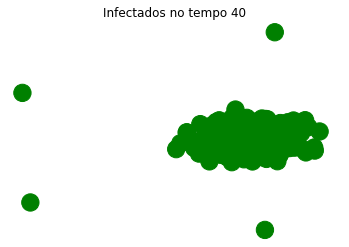

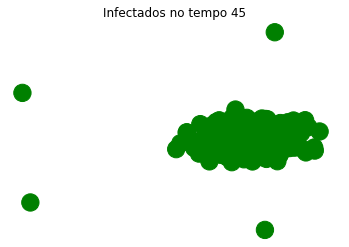

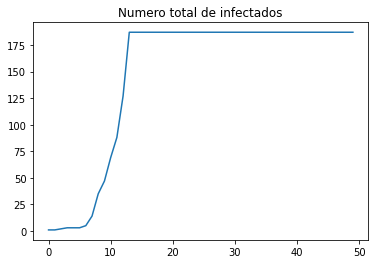

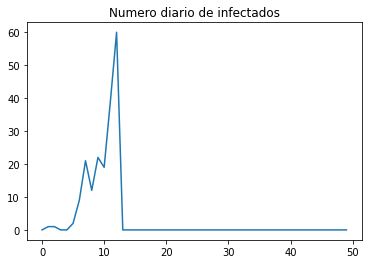

In [ ]:
G = nx.Graph()
lista = []
T = 50
Tl = [i for i in range(T)] 
criaGrafo(G, lista, 1, 1000)
cont = contaminacao_com_vacina(G, lista, 0.1, 1, 5)

####Livre de Escala


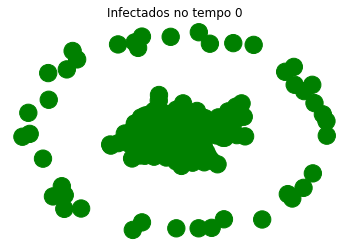

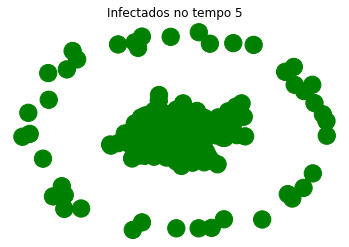

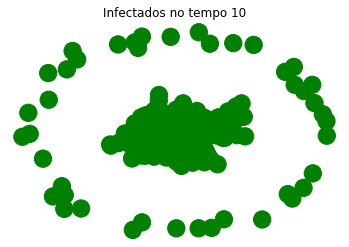

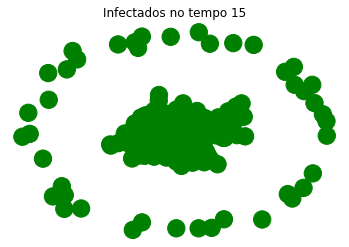

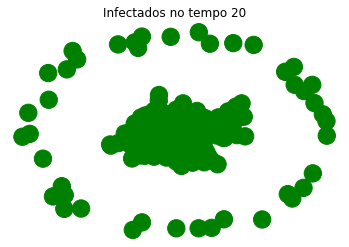

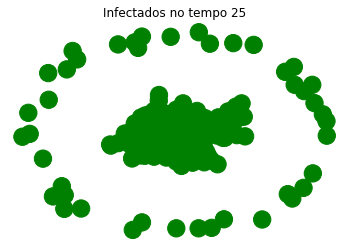

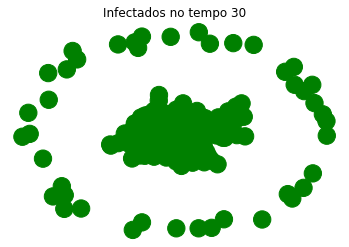

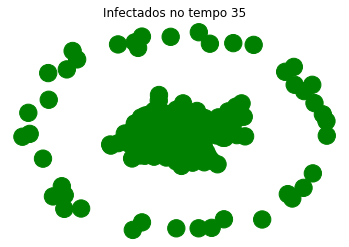

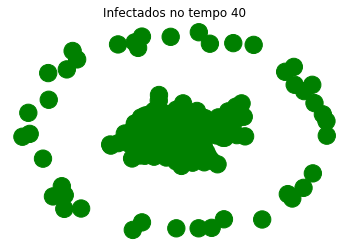

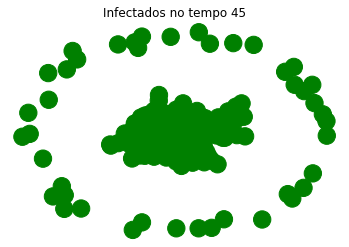

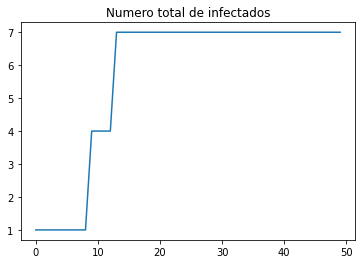

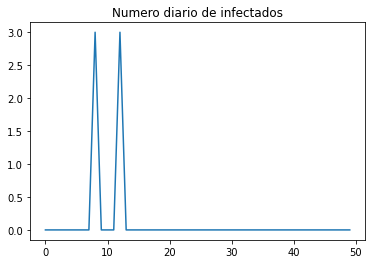

In [ ]:
G = nx.Graph()
lista = []
T = 50
Tl = [i for i in range(T)] 
criaGrafo(G, lista, 0.35, 2000)
cont = contaminacao_com_vacina(G, lista, 0.1, 1, 5)

Nesta simulação, como há a introdução de uma vacina na população, a probabilidade de se contrair a doença vai diminuindo com o tempo, uma vez que a população vacinada vai aumentando. Assim é possivel perceber o aumento dos casos no inicio, mas quando as vacinas comecam a ser aplicadas, o numero de casos diarios diminui e os casos totais se estabilizam. Assim também se evitou que toda a população se contaminasse, como acontecia em outras simulações